In [2]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

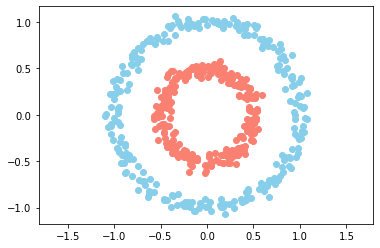

In [3]:
# Crear el conjunto de datos

n = 500
p = 2

x, y = make_circles(n_samples = n, factor = 0.5, noise = 0.05)

y = y[:, np.newaxis]

plt.scatter(x[y[:, 0] == 0, 0], x[y[:, 0] == 0,1], c="skyblue")
plt.scatter(x[y[:, 0] == 1, 0], x[y[:, 0] == 1,1], c="salmon")
plt.axis("equal")
plt.show()

In [4]:
# Clase de la capa de la red neuronal

class neural_layer():
    def __init__(self, n_conn, n_neur, act_f):
        self.act_f = act_f
        self.b = np.random.rand(1, n_neur)*2 -1
        self.w = np.random.rand(n_conn, n_neur)*2 -1

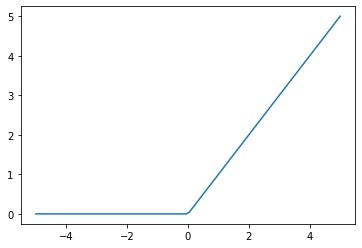

In [5]:
# Funciones de activación

sigm = (lambda x: 1/(1+np.e**(-x)),
        lambda x: x*(1-x))

relu = lambda x: np.maximum(0, x)

_x = np.linspace(-5, 5, 100)
plt.plot(_x,relu(_x))

In [6]:
l0 = neural_layer(p, 4, sigm)
l1 = neural_layer(4, 8, sigm)
# ...

def create_nn(topology, act_f):
    nn = []
    for l, layer in enumerate(topology[:-1]):
        nn.append(neural_layer(topology[l], topology[l+1], act_f))
    return nn

In [14]:
topology = [p, 4, 8, 1]

neural_net = create_nn(topology, sigm)

l2_cost = (lambda yp, yr: np.mean((yp-yr)**2),
           lambda yp, yr: (yp-yr))

def train(neural_net, x, y, l2_cost, lr=0.5, train = True):
    out = [(None, x)]
    
    # Forward pass
    for l, layer in enumerate(neural_net):
        z = out[-1][1] @ neural_net[l].w + neural_net[l].b
        a = neural_net[l].act_f[0](z)
        
        out.append((z, a))
    
    if train:
        # Backward pass
        deltas = []
        
        for l in reversed(range(0, len(neural_net))):
            z = out[l+1][0]
            a = out[l+1][1]
            
            if l == len(neural_net)-1:
                deltas.insert(0, l2_cost[1](a, y) * neural_net[l].act_f[1](a))
            else:
                deltas.insert(0, deltas[0] @ _w.T * neural_net[l].act_f[1](a))
                
            _w = neural_net[l].w
            
            # Gradient descent
            neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis = 0, keepdims=True) * lr
            neural_net[l].w = neural_net[l].w - out[l][1].T @ deltas[0] * lr
            
    return out[-1][1]
    
train(neural_net, x, y, l2_cost, 0.5)


array([[0.70769324],
       [0.71478618],
       [0.7084218 ],
       [0.70782772],
       [0.70329521],
       [0.7071146 ],
       [0.71725306],
       [0.71633643],
       [0.71606232],
       [0.71484233],
       [0.71487104],
       [0.70989855],
       [0.70689968],
       [0.71414773],
       [0.70915179],
       [0.70236097],
       [0.71191356],
       [0.71021307],
       [0.70727042],
       [0.70736889],
       [0.7037689 ],
       [0.71379739],
       [0.70915659],
       [0.71469382],
       [0.71476484],
       [0.71506317],
       [0.70954494],
       [0.70848629],
       [0.71276457],
       [0.7047884 ],
       [0.71379593],
       [0.71541396],
       [0.70627291],
       [0.70992549],
       [0.71752302],
       [0.71412581],
       [0.71705857],
       [0.71013032],
       [0.70736076],
       [0.7145939 ],
       [0.70677953],
       [0.71623134],
       [0.7117929 ],
       [0.70386234],
       [0.70825971],
       [0.70588222],
       [0.70837422],
       [0.713

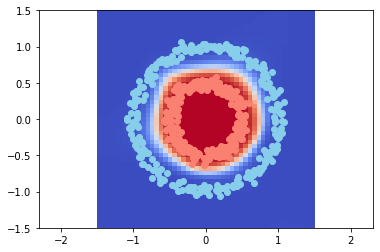

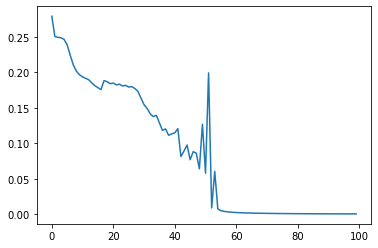

In [15]:
import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

loss = []

for i in range(2500):
    
    # Entrenemos la red
    py = train(neural_n, x, y, l2_cost, lr=0.05)
    
    if i % 25 == 0:
        loss.append(l2_cost[0](py, y))
        
        res = 50
        
        _x0 = np.linspace(-1.5, 1.5, res)
        _x1 = np.linspace(-1.5, 1.5, res)
        
        _y = np.zeros((res, res))
        
        for i0, x0 in enumerate(_x0):
            for i1, x1 in enumerate(_x1):
                _y[i0, i1] = train(neural_n, np.array([[x0,x1]]), y, l2_cost, train = False)[0][0]
                
        plt.pcolormesh(_x0, _x1, _y, cmap="coolwarm")
        plt.axis("equal")
        
        plt.scatter(x[y[:, 0] == 0, 0], x[y[:, 0] == 0, 1], c="skyblue")
        plt.scatter(x[y[:, 0] == 1, 0], x[y[:, 0] == 1, 1], c="salmon")
        
        clear_output(wait=True)
        plt.show()
        plt.plot(range(len(loss)), loss)
        plt.show()
        time.sleep(0.5)